In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from numpy.fft import fft2, fftshift, ifft2, ifftshift

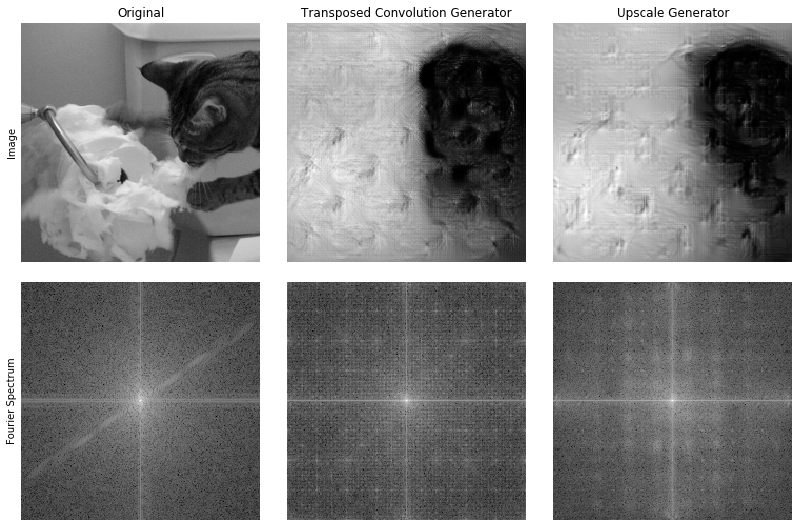

In [2]:
scale = 0.75
fig, ax  = plt.subplots(2,3, figsize=(scale*15,scale*10))

original_img = io.imread('original.png', as_gray=True)
fourier_original = np.log(np.abs(fftshift(fft2(original_img))))

up_img = io.imread('upscale.png', as_gray=True)
fourier_up = np.log(np.abs(fftshift(fft2(up_img))))

trans_img = io.imread('trans.png', as_gray=True)
fourier_trans = np.log(np.abs(fftshift(fft2(trans_img))))

cmap = 'gray'
ax[0,0].imshow(original_img, cmap=cmap)
ax[1,0].imshow(fourier_original, cmap=cmap)
ax[0,1].imshow(trans_img, cmap=cmap)
ax[1,1].imshow(fourier_trans, cmap=cmap)
ax[0,2].imshow(up_img, cmap=cmap)
ax[1,2].imshow(fourier_up, cmap=cmap)

ax[0,0].set_title('Original')
ax[0,1].set_title('Transposed Convolution Generator')
ax[0,2].set_title('Upscale Generator')

ax[0,0].set_ylabel('Image')
ax[1,0].set_ylabel('Fourier Spectrum')

for i in range(2):
    for j in range(3):
        plt.setp(ax[i,j].spines.values(), visible=False)
        ax[i,j].xaxis.set_visible(False)
        ax[i,j].tick_params(left=False, labelleft=False)
# ax[0,0].axis('off')
# ax[1,0].axis('off')
# ax[0,1].axis('off')
# ax[1,1].axis('off')
# ax[2,0].axis('off')
# ax[2,1].axis('off')


plt.tight_layout()

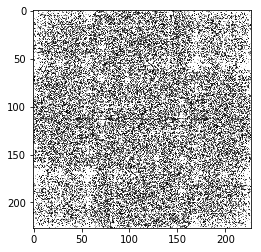

In [3]:
plt.imshow(np.abs(fourier_trans - fourier_up), vmin=0, vmax=1, cmap='gray')